In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nRowsRead = 1000 

df1 = pd.read_csv('CreditScore_train.csv', delimiter=',')
df1.dataframeName = 'CreditScore_train.csv'
df1.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


In [3]:
df2 = pd.read_csv('CreditScore_test.csv', delimiter=',')
df2.dataframeName = 'CreditScore_test.csv'
df2.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1566464,21.0,21.0,21.0,44.0,1,0,0,4,0,...,0,NaN,0,0,1,1,5.0,0,NaN,406
1,925102,108.0,2.0,27.0,156.0,0,2,3,3,1,...,13090,0.593,1,1,1,0,1.0,0,NaN,679
2,1273974,218.0,64.0,107.0,218.0,0,0,0,0,0,...,13689,1.014,1,1,1,0,1.0,13689,1.014,750
3,1456723,NaN,NaN,NaN,146.0,1,0,0,1,1,...,0,NaN,1,1,1,0,NaN,0,NaN,515
4,798267,0.0,0.0,0.0,230.0,1,2,4,0,2,...,0,NaN,1,1,1,0,NaN,0,NaN,589


In [4]:
nRow, nCol = df1.shape
print(f'TRAIN DATA : There are {nRow} rows and {nCol} columns')

nRow, nCol = df2.shape
print(f'TEST DATA : There are {nRow} rows and {nCol} columns')

df1["source"] = "train"
df2["source"] = "test"

merged_df = pd.concat([df1,df2])
merged_df.dataframeName = 'Merged_DF'

nRow, nCol = merged_df.shape
print(f'MERGED DATA : There are {nRow} rows and {nCol} columns')

TRAIN DATA : There are 80000 rows and 305 columns
TEST DATA : There are 20000 rows and 305 columns
MERGED DATA : There are 100000 rows and 306 columns


In [5]:
merged_df.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,train


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 19999
Columns: 306 entries, x001 to source
dtypes: float64(41), int64(264), object(1)
memory usage: 234.2+ MB


In [7]:
merged_df.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x297', 'x298', 'x299', 'x300', 'x301', 'x302', 'x303', 'x304', 'y',
       'source'],
      dtype='object', length=306)

In [8]:
merged_df.dtypes

x001        int64
x002      float64
x003      float64
x004      float64
x005      float64
           ...   
x302      float64
x303        int64
x304      float64
y           int64
source     object
Length: 306, dtype: object

In [9]:
merged_df.isnull().any()

x001      False
x002       True
x003       True
x004       True
x005       True
          ...  
x302       True
x303      False
x304       True
y         False
source    False
Length: 306, dtype: bool

In [10]:
merged_df.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
          ...  
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int64

In [11]:
merged_df.duplicated().sum()

0

In [12]:
merged_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x001,100000.0,NaN,NaN,NaN,1218243.8211,272897.724977,517.0,974363.5,1235926.0,1445326.25,1677197.0
x002,78568.0,NaN,NaN,NaN,125.711727,115.785117,0.0,32.0,100.0,180.0,718.0
x003,78568.0,NaN,NaN,NaN,25.541238,49.028751,0.0,3.0,8.0,24.0,704.0
x004,78576.0,NaN,NaN,NaN,65.393212,63.592317,0.0,19.0,48.0,92.0,704.0
x005,93890.0,NaN,NaN,NaN,178.238545,124.520628,0.0,87.0,150.0,246.0,827.0
...,...,...,...,...,...,...,...,...,...,...,...
x302,26931.0,NaN,NaN,NaN,2.948758,2.12943,1.0,1.0,1.0,5.0,9.0
x303,100000.0,NaN,NaN,NaN,6410.88291,24190.243313,0.0,0.0,0.0,0.0,785537.0
x304,18125.0,NaN,NaN,NaN,1.037957,0.33058,0.0,0.9758,1.0486,1.1862,5.1569
y,100000.0,NaN,NaN,NaN,619.19823,118.461932,300.0,524.0,599.0,720.0,839.0


In [13]:
total = merged_df.count()
sumcol=merged_df.isnull().sum()
countcol=merged_df.isnull().count()

percent = (merged_df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
missing_data.sort_values(['Percent'], axis=0, ascending=False)

miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
miss_perc

,Total,Percent,Sumcol,countcol
x242,6661,93.339,93339,100000
x295,13467,86.533,86533,100000
x304,18125,81.875,81875,100000
x098,19319,80.681,80681,100000
x155,20949,79.051,79051,100000
...,...,...,...,...
x107,100000,0.000,0,100000
x106,100000,0.000,0,100000
x105,100000,0.000,0,100000
x104,100000,0.000,0,100000


In [14]:
total = merged_df.count()
sumcol=merged_df.isnull().sum()
countcol=merged_df.isnull().count()

percent = (merged_df.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)

      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x257  23087   76.913   76913    100000
x256  23087   76.913   76913    100000
x255  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x266  33539   66.461   66461    100000
x253  33667   66.333   66333    100000


In [15]:
drop_cols=m_per.index
print(drop_cols)
filtered_df=merged_df.drop(columns=drop_cols,axis=1)
print(filtered_df.shape)

Index(['x242', 'x295', 'x304', 'x098', 'x155', 'x259', 'x257', 'x256', 'x255',
       'x302', 'x268', 'x162', 'x267', 'x265', 'x266', 'x253'],
      dtype='object')
(100000, 290)


In [16]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x294,x296,x297,x298,x299,x300,x301,x303,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0,17318,0.8417,1,1,1,0,0,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0,NaN,0,0,0,0,0,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,0,NaN,1,1,1,0,0,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,0,17413,1.0180,1,1,1,0,0,485,train


In [17]:
filtered_df['y']

0        807
1        819
2        803
3        530
4        485
        ... 
19995    541
19996    831
19997    543
19998    488
19999    491
Name: y, Length: 100000, dtype: int64

In [18]:
filtered_df.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x294', 'x296', 'x297', 'x298', 'x299', 'x300', 'x301', 'x303', 'y',
       'source'],
      dtype='object', length=290)

In [19]:
filtered_df['source'].unique()

array(['train', 'test'], dtype=object)

In [20]:
filtered_df.head(10)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x294,x296,x297,x298,x299,x300,x301,x303,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0,17318,0.8417,1,1,1,0,0,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0,NaN,0,0,0,0,0,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,0,NaN,1,1,1,0,0,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,0,17413,1.0180,1,1,1,0,0,485,train
5,807817,112.0,112.0,112.0,187.0,1,0,0,0,0,...,0,0,NaN,0,0,0,0,0,665,train
6,906658,343.0,54.0,220.0,346.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,751,train
7,1202685,175.0,13.0,75.0,208.0,1,0,0,5,1,...,0,8883,0.8882,1,1,1,0,0,751,train
8,1547270,53.0,5.0,29.0,86.0,0,1,1,0,1,...,0,0,NaN,1,1,1,0,0,642,train
9,1163310,NaN,NaN,NaN,46.0,1,0,0,1,3,...,0,0,NaN,1,1,1,0,0,473,train


In [21]:
filtered_df.drop(columns='source').corr()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x293,x294,x296,x297,x298,x299,x300,x301,x303,y
x001,1.000000,0.097072,0.025511,0.087469,0.113784,-0.000547,0.010608,-0.044504,-0.030123,-0.003545,...,-0.065975,-0.006394,0.022424,-0.065261,0.005124,0.003995,0.002616,-0.030275,0.000948,0.164841
x002,0.097072,1.000000,0.297062,0.831371,0.750919,0.120643,-0.129729,-0.157916,-0.081200,-0.021819,...,-0.187345,-0.012817,0.053361,-0.227488,-0.135093,-0.138014,-0.135702,-0.081512,0.006848,0.485744
x003,0.025511,0.297062,1.000000,0.705223,0.227947,0.240625,-0.259942,-0.291211,-0.206302,-0.166482,...,0.016024,-0.018867,-0.136799,-0.125642,-0.300638,-0.301812,-0.295704,-0.011853,-0.062418,0.121207
x004,0.087469,0.831371,0.705223,1.000000,0.631568,0.229115,-0.271451,-0.317127,-0.212224,-0.141670,...,-0.149730,-0.011747,-0.051084,-0.234940,-0.273436,-0.275642,-0.270071,-0.055242,-0.022077,0.419683
x005,0.113784,0.750919,0.227947,0.631568,1.000000,0.122944,-0.056136,-0.071533,-0.023301,0.026116,...,-0.242591,-0.017443,0.062033,-0.267558,-0.069118,-0.072397,-0.071658,-0.097527,-0.012633,0.575970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x299,0.003995,-0.138014,-0.301812,-0.275642,-0.072397,-0.006697,0.212601,0.267836,0.283532,0.279102,...,0.026379,0.141657,0.325164,0.013785,0.970710,1.000000,0.952600,0.150524,0.235273,-0.044871
x300,0.002616,-0.135702,-0.295704,-0.270071,-0.071658,-0.001825,0.205060,0.261208,0.282168,0.279145,...,0.021636,0.135167,0.310270,0.005682,0.924699,0.952600,1.000000,0.157876,0.224271,-0.040356
x301,-0.030275,-0.081512,-0.011853,-0.055242,-0.097527,-0.004430,0.002587,0.007798,0.015815,0.021516,...,0.265378,0.163202,0.088438,0.202130,0.146897,0.150524,0.157876,1.000000,0.259973,-0.224484
x303,0.000948,0.006848,-0.062418,-0.022077,-0.012633,-0.008938,0.090616,0.104891,0.126229,0.142824,...,0.336634,0.360322,0.608868,0.320933,0.242045,0.235273,0.224271,0.259973,1.000000,-0.035370


Text(0.5, 1.0, 'PEARSON CORRELATION')

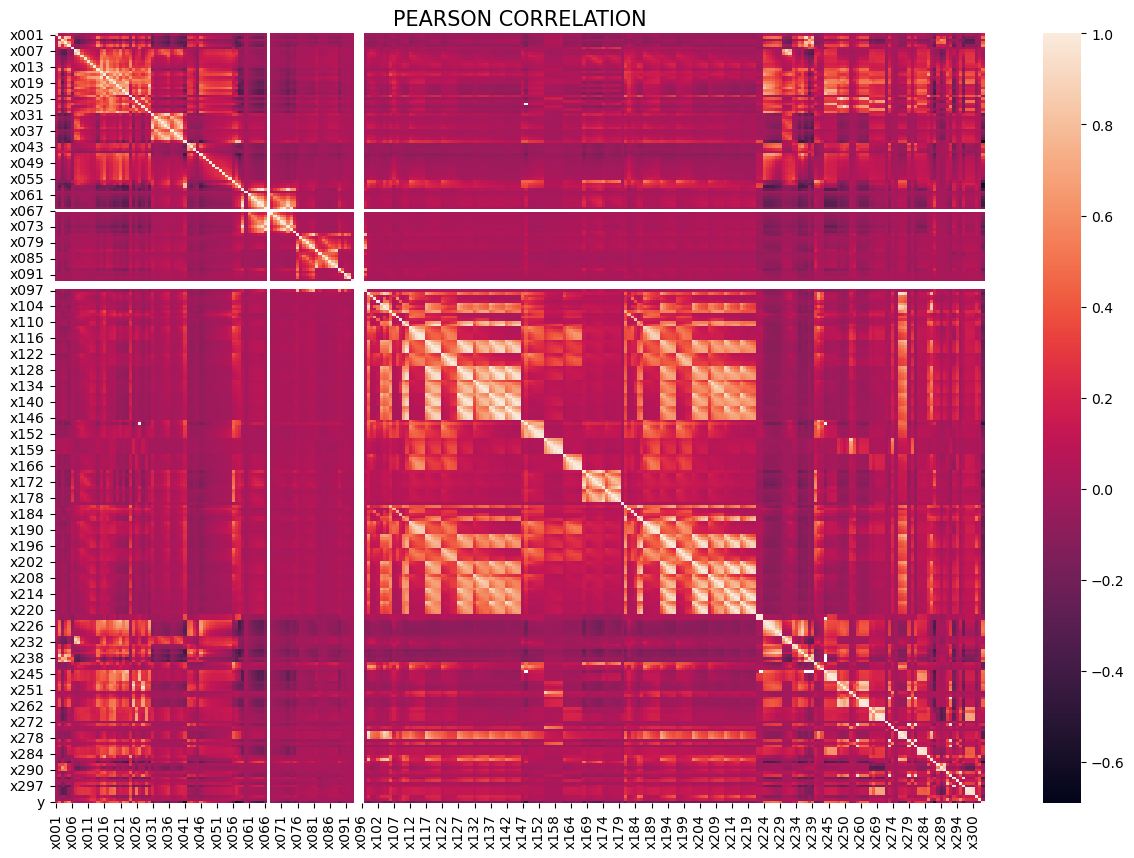

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(filtered_df.drop(columns='source').corr(method="pearson"))
plt.title('PEARSON CORRELATION', fontsize=15)

<Axes: >

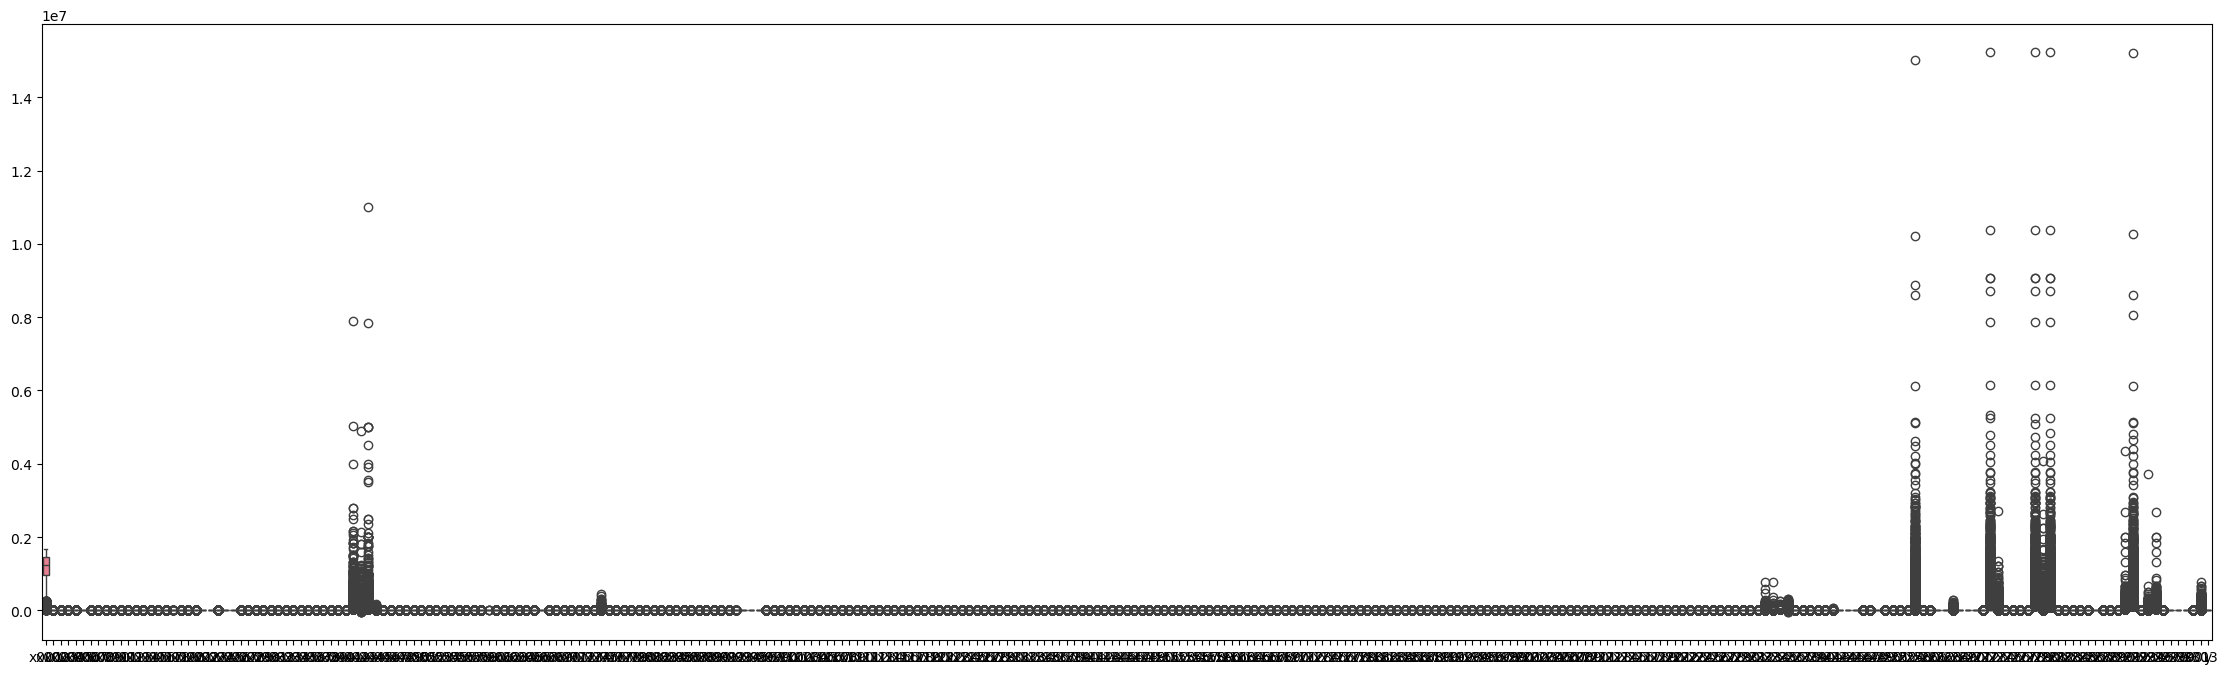

In [23]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=filtered_df)

In [24]:
print(pd.isnull(filtered_df).any())

x001      False
x002       True
x003       True
x004       True
x005       True
          ...  
x300      False
x301      False
x303      False
y         False
source    False
Length: 290, dtype: bool


In [25]:
filtered_df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x294,x296,x297,x298,x299,x300,x301,x303,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,0,NaN,0,0,0,0,0,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0,17318,0.8417,1,1,1,0,0,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,0,NaN,0,0,0,0,0,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,0,NaN,1,1,1,0,0,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,0,17413,1.0180,1,1,1,0,0,485,train


In [26]:
filtered_df.isnull().any()

x001      False
x002       True
x003       True
x004       True
x005       True
          ...  
x300      False
x301      False
x303      False
y         False
source    False
Length: 290, dtype: bool

In [27]:
cor_target = abs(filtered_df.drop(columns='source').corr()["y"])
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64

In [28]:
relevant_features.item

<bound method IndexOpsMixin.item of x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64>

In [29]:
filtered_df.shape

(100000, 290)

In [30]:
lst_key=[]
null_key=[]
for i,j in relevant_features.items():
    lst_key.append(i)

final_df=filtered_df.drop(columns=lst_key,axis=1)
print(final_df.shape)

(100000, 65)


In [31]:
a=final_df.isnull().any()==True

In [32]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)
final_df=filtered_df.drop(columns=lst_key,axis=1)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [33]:
type(a)

pandas.core.series.Series

In [34]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297', 'x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [35]:
for i in null_key:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape 

(100000, 65)

In [36]:
final_df.head()

,x002,x004,x005,x014,x015,x017,x018,x019,x020,x022,...,x261,x262,x276,x277,x278,x287,x293,x297,y,source
0,426.000000,128.000000,426.0,9,19,14,8,5,6,3,...,1,1,0,0,0,1.000000,0.812575,0.794034,807,train
1,160.000000,64.000000,160.0,5,21,16,5,3,9,3,...,1,1,0,0,0,1.000000,0.841700,0.841700,819,train
2,163.000000,104.000000,239.0,6,8,5,4,2,7,3,...,0,0,0,0,0,3.239309,0.812575,0.794034,803,train
3,125.711727,65.393212,102.0,0,4,4,2,0,0,0,...,0,0,0,0,0,9.000000,0.812575,0.794034,530,train
4,3.000000,2.000000,62.0,0,5,3,2,2,2,1,...,0,0,1,1,1,9.000000,1.018000,1.018000,485,train


In [37]:
train_final = final_df[final_df.source=="train"]
test_final = final_df[final_df.source=="test"]

print(train_final.shape)
print(test_final.shape)

train_final.drop(columns="source",inplace=True)
test_final.drop(columns="source",inplace=True)

(80000, 65)
(20000, 65)


In [38]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(80000, 63)
(80000,)


In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [40]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64000, 63)
(16000, 63)
(64000,)
(16000,)


Linear: Mean = -39.976, Std = 0.392
Time taken for processing Linear: 0:00:07.389001
Lasso: Mean = -56.877, Std = 0.465
Time taken for processing Lasso: 0:00:10.683999
Ridge: Mean = -40.023, Std = 0.391
Time taken for processing Ridge: 0:00:12.075000
ElasticNet: Mean = -73.933, Std = 0.891
Time taken for processing ElasticNet: 0:00:14.198998
DecisionTree: Mean = -34.932, Std = 0.519
Time taken for processing DecisionTree: 0:00:54.342997
KNN: Mean = -38.385, Std = 0.332
Time taken for processing KNN: 0:01:37.161534
RandomForest: Mean = -24.463, Std = 0.267
Time taken for processing RandomForest: 0:44:34.285257
AdaBoost: Mean = -43.704, Std = 0.798
Time taken for processing AdaBoost: 0:49:00.716620
GradientBoost: Mean = -27.888, Std = 0.243
Time taken for processing GradientBoost: 0:58:22.512956
XGBoost: Mean = -24.268, Std = 0.235
Time taken for processing XGBoost: 0:58:46.522491


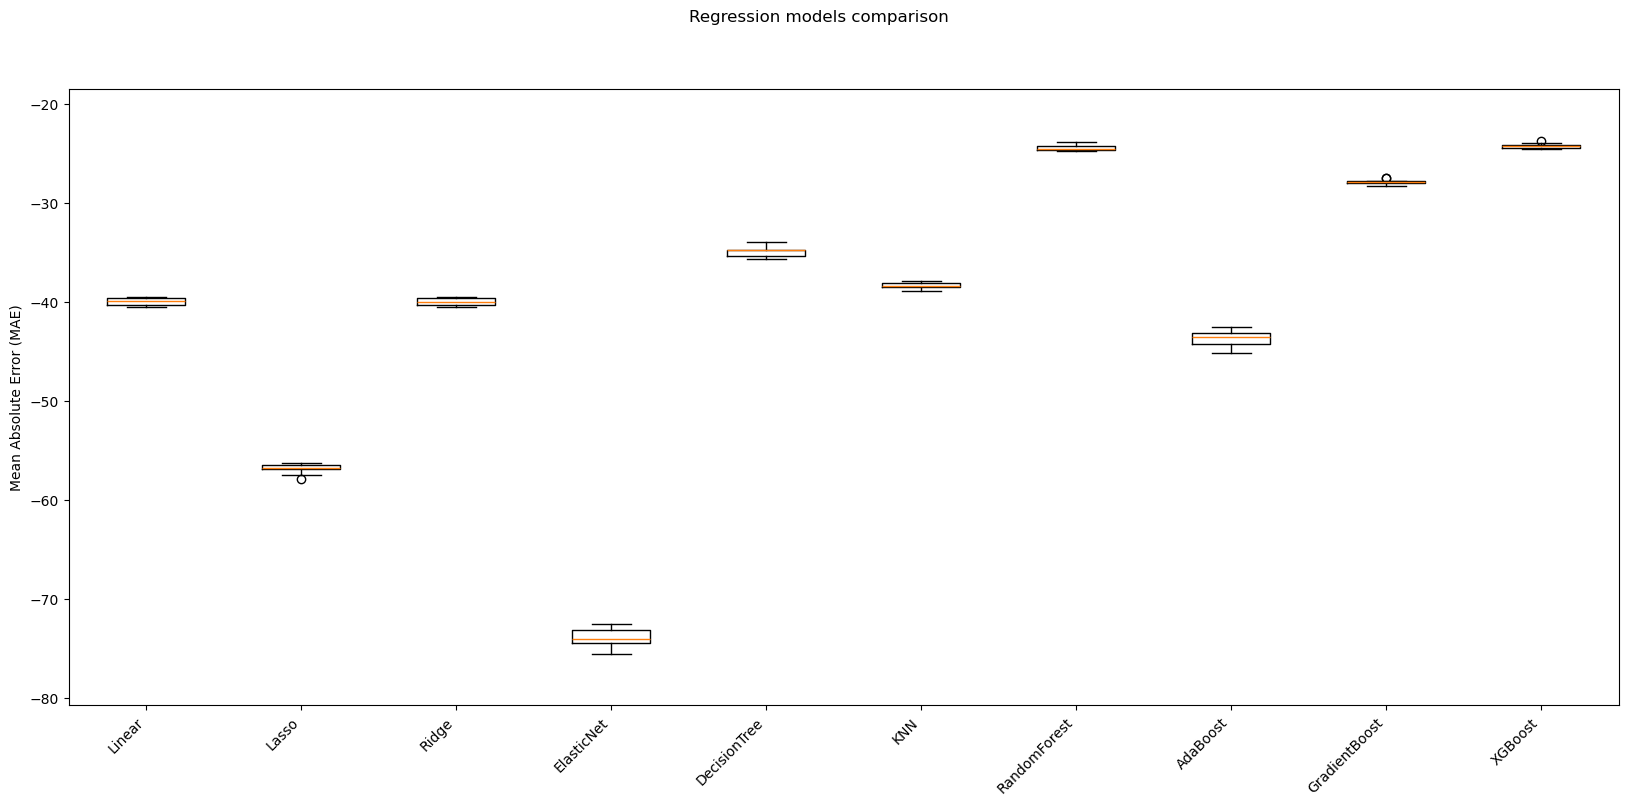

In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import time
import datetime

start = time.time()

# User variables to tune
folds = 10
metric = "neg_mean_absolute_error"

# Hold different regression models in a single dictionary
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# 10-fold cross validation for each model
model_results = []
model_names = []
for model_name, model in models.items():
    k_fold = KFold(n_splits=folds, shuffle=True, random_state=42)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: Mean = {}, Std = {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
    
    end = time.time()
    list_lapse = end - start
    print("Time taken for processing {}: {}".format(model_name, str(datetime.timedelta(seconds=list_lapse))))

# Box-whisker plot to compare regression models
figure = plt.figure(figsize=(20, 8))
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation=45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)
plt.show()

In [45]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.591343031382272


In [46]:
model = RandomForestRegressor()
model.fit(X_test,Y_test)

#Predicting TEST & TRAIN DATA
#train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  1.6936297800509956


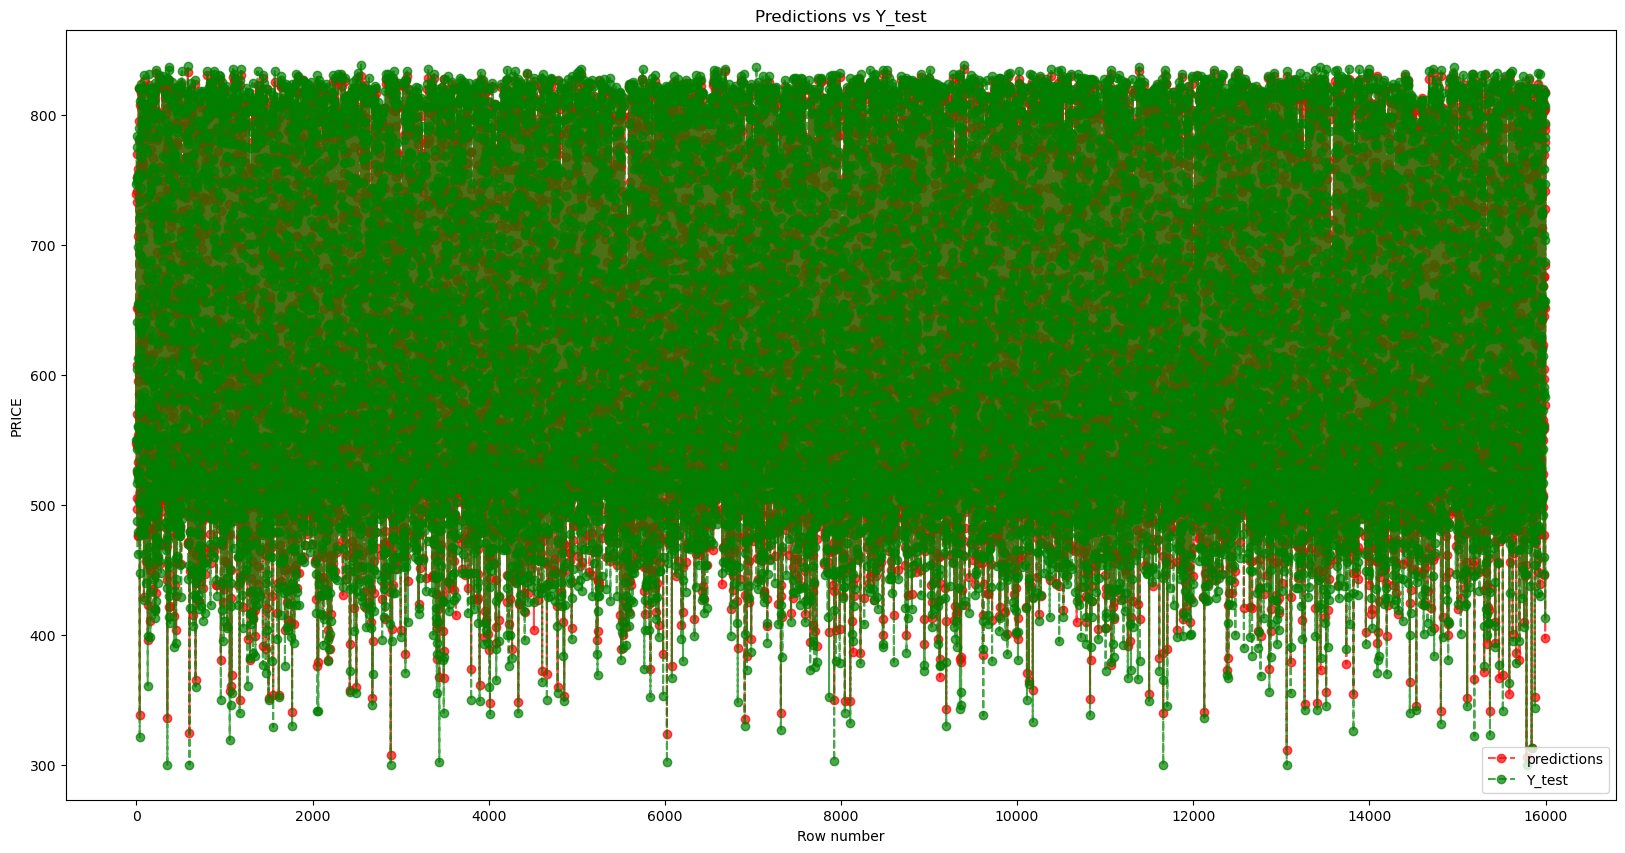

In [51]:
x_axis = np.array(range(0, test_predict.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, test_predict, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')

In [52]:
dtrain_predictions = model.predict(X_train)

In [53]:
print("\nModel Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_train, dtrain_predictions)))


Model Report
RMSE : 35.96


Text(0.5, 1.0, 'Variable Importance')

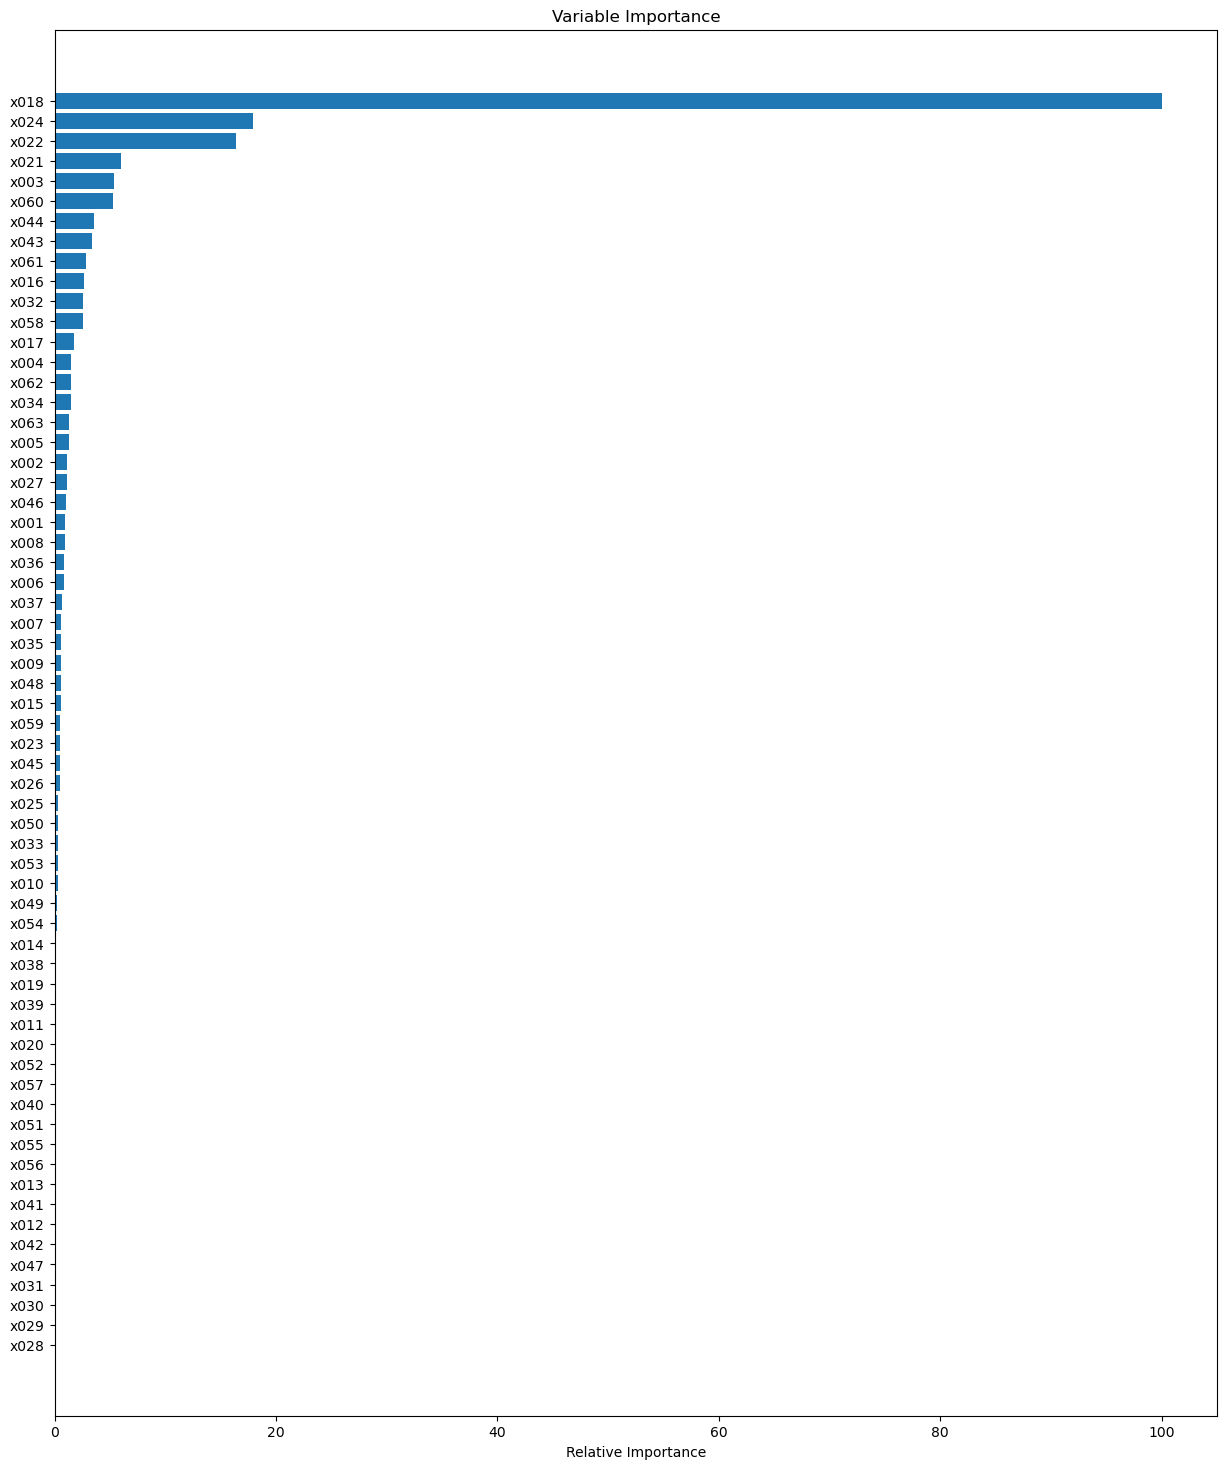

In [54]:
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (15,18))

#Make a horizontal bar plot.
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df1.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')